In [252]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns

In [253]:
df = pd.read_csv('C:/Users/user/OneDrive/바탕 화면/titanic.csv', index_col = 0)

In [254]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [255]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [256]:
#총 891개의 샘플들 중 Cabin 데이터의 갯수는 687개나 없으므로, Cabin열 자체를 지워버린다.
df = df.drop('Cabin', axis = 1)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [257]:
#Age의 결측값은 177개나 되므로 각 결측값을 평균값으로 변환한다.
df.loc[df['Age'] != df['Age'], 'Age'] = df['Age'].mean()

In [258]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S


In [259]:
#성공적으로 Age에 null 값이 제거 됐는지 확인한다. 
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

In [260]:
#Embarked 속성에 결측값이 있는 샘플들을 모두 삭제한다.
df = df.dropna()
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [261]:
#상관관계를 분석하기 위해, 문자 데이터 타입이 무엇인지 파악한다.
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Embarked     object
dtype: object

In [262]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# 'Sex'와 'Embarked' 열을 LabelEncoder로 변환
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])
df['Name'] = le.fit_transform(df['Name'])
df['Ticket'] = le.fit_transform(df['Ticket'])

df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_30580\3712359939.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'] = le.fit_transform(df['Sex'])
C:\Users\user\AppData\Local\Temp\ipykernel_30580\3712359939.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Embarked'] = le.fit_transform(df['Embarked'])
C:\Users\user\AppData\Local\Temp\ipykernel_30580\3712359939.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,108,1,22.0,1,0,522,7.2500,2
2,1,1,190,0,38.0,1,0,595,71.2833,0
3,1,3,353,0,26.0,0,0,668,7.9250,2
4,1,1,272,0,35.0,1,0,48,53.1000,2
5,0,3,15,1,35.0,0,0,471,8.0500,2


In [263]:
#data type을 확인해본 결과, 'Sex'와 'Embarked' 데이터가 int 타입으로 바뀐걸 확인할 수 있다.
df.dtypes

Survived      int64
Pclass        int64
Name          int32
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Ticket        int32
Fare        float64
Embarked      int32
dtype: object

In [264]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,108,1,22.000000,1,0,522,7.2500,2
2,1,1,190,0,38.000000,1,0,595,71.2833,0
3,1,3,353,0,26.000000,0,0,668,7.9250,2
4,1,1,272,0,35.000000,1,0,48,53.1000,2
5,0,3,15,1,35.000000,0,0,471,8.0500,2
...,...,...,...,...,...,...,...,...,...,...
887,0,2,547,1,27.000000,0,0,100,13.0000,2
888,1,1,303,0,19.000000,0,0,14,30.0000,2
889,0,3,412,0,29.699118,1,2,674,23.4500,2


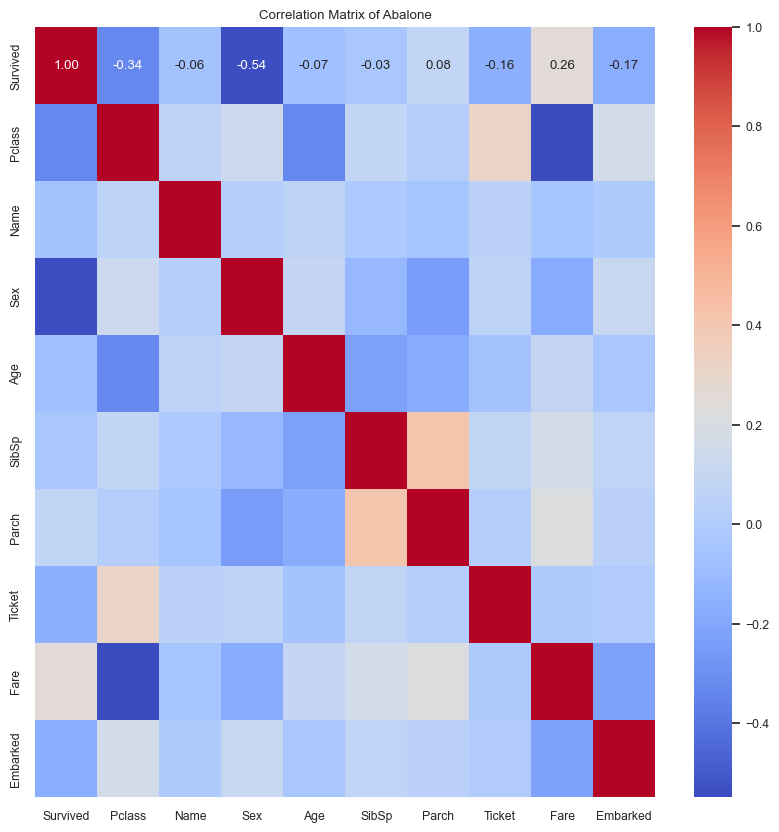

In [265]:
#상관 관계 행렬
data_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(data_corr, annot=True, cmap='coolwarm', fmt='.2f')
#sns.heatmap(data_corr, annot=True, cbar=False)
plt.title('Correlation Matrix of Abalone')
plt.show()

#왜인지는 모르겠는데, 한줄 밖에 안뜬다.. 그래도 target과의 상관계수는 뜨니까, target인 Survived와 0.16이상의 상관계수를 가진 속성들만
#남기고 모두 지우자 (Pclass, Sex, Ticket, Fare, Embarked만 남기자)

C:\Users\user\anaconda3\envs\test01\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\envs\test01\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\envs\test01\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\envs\test01\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

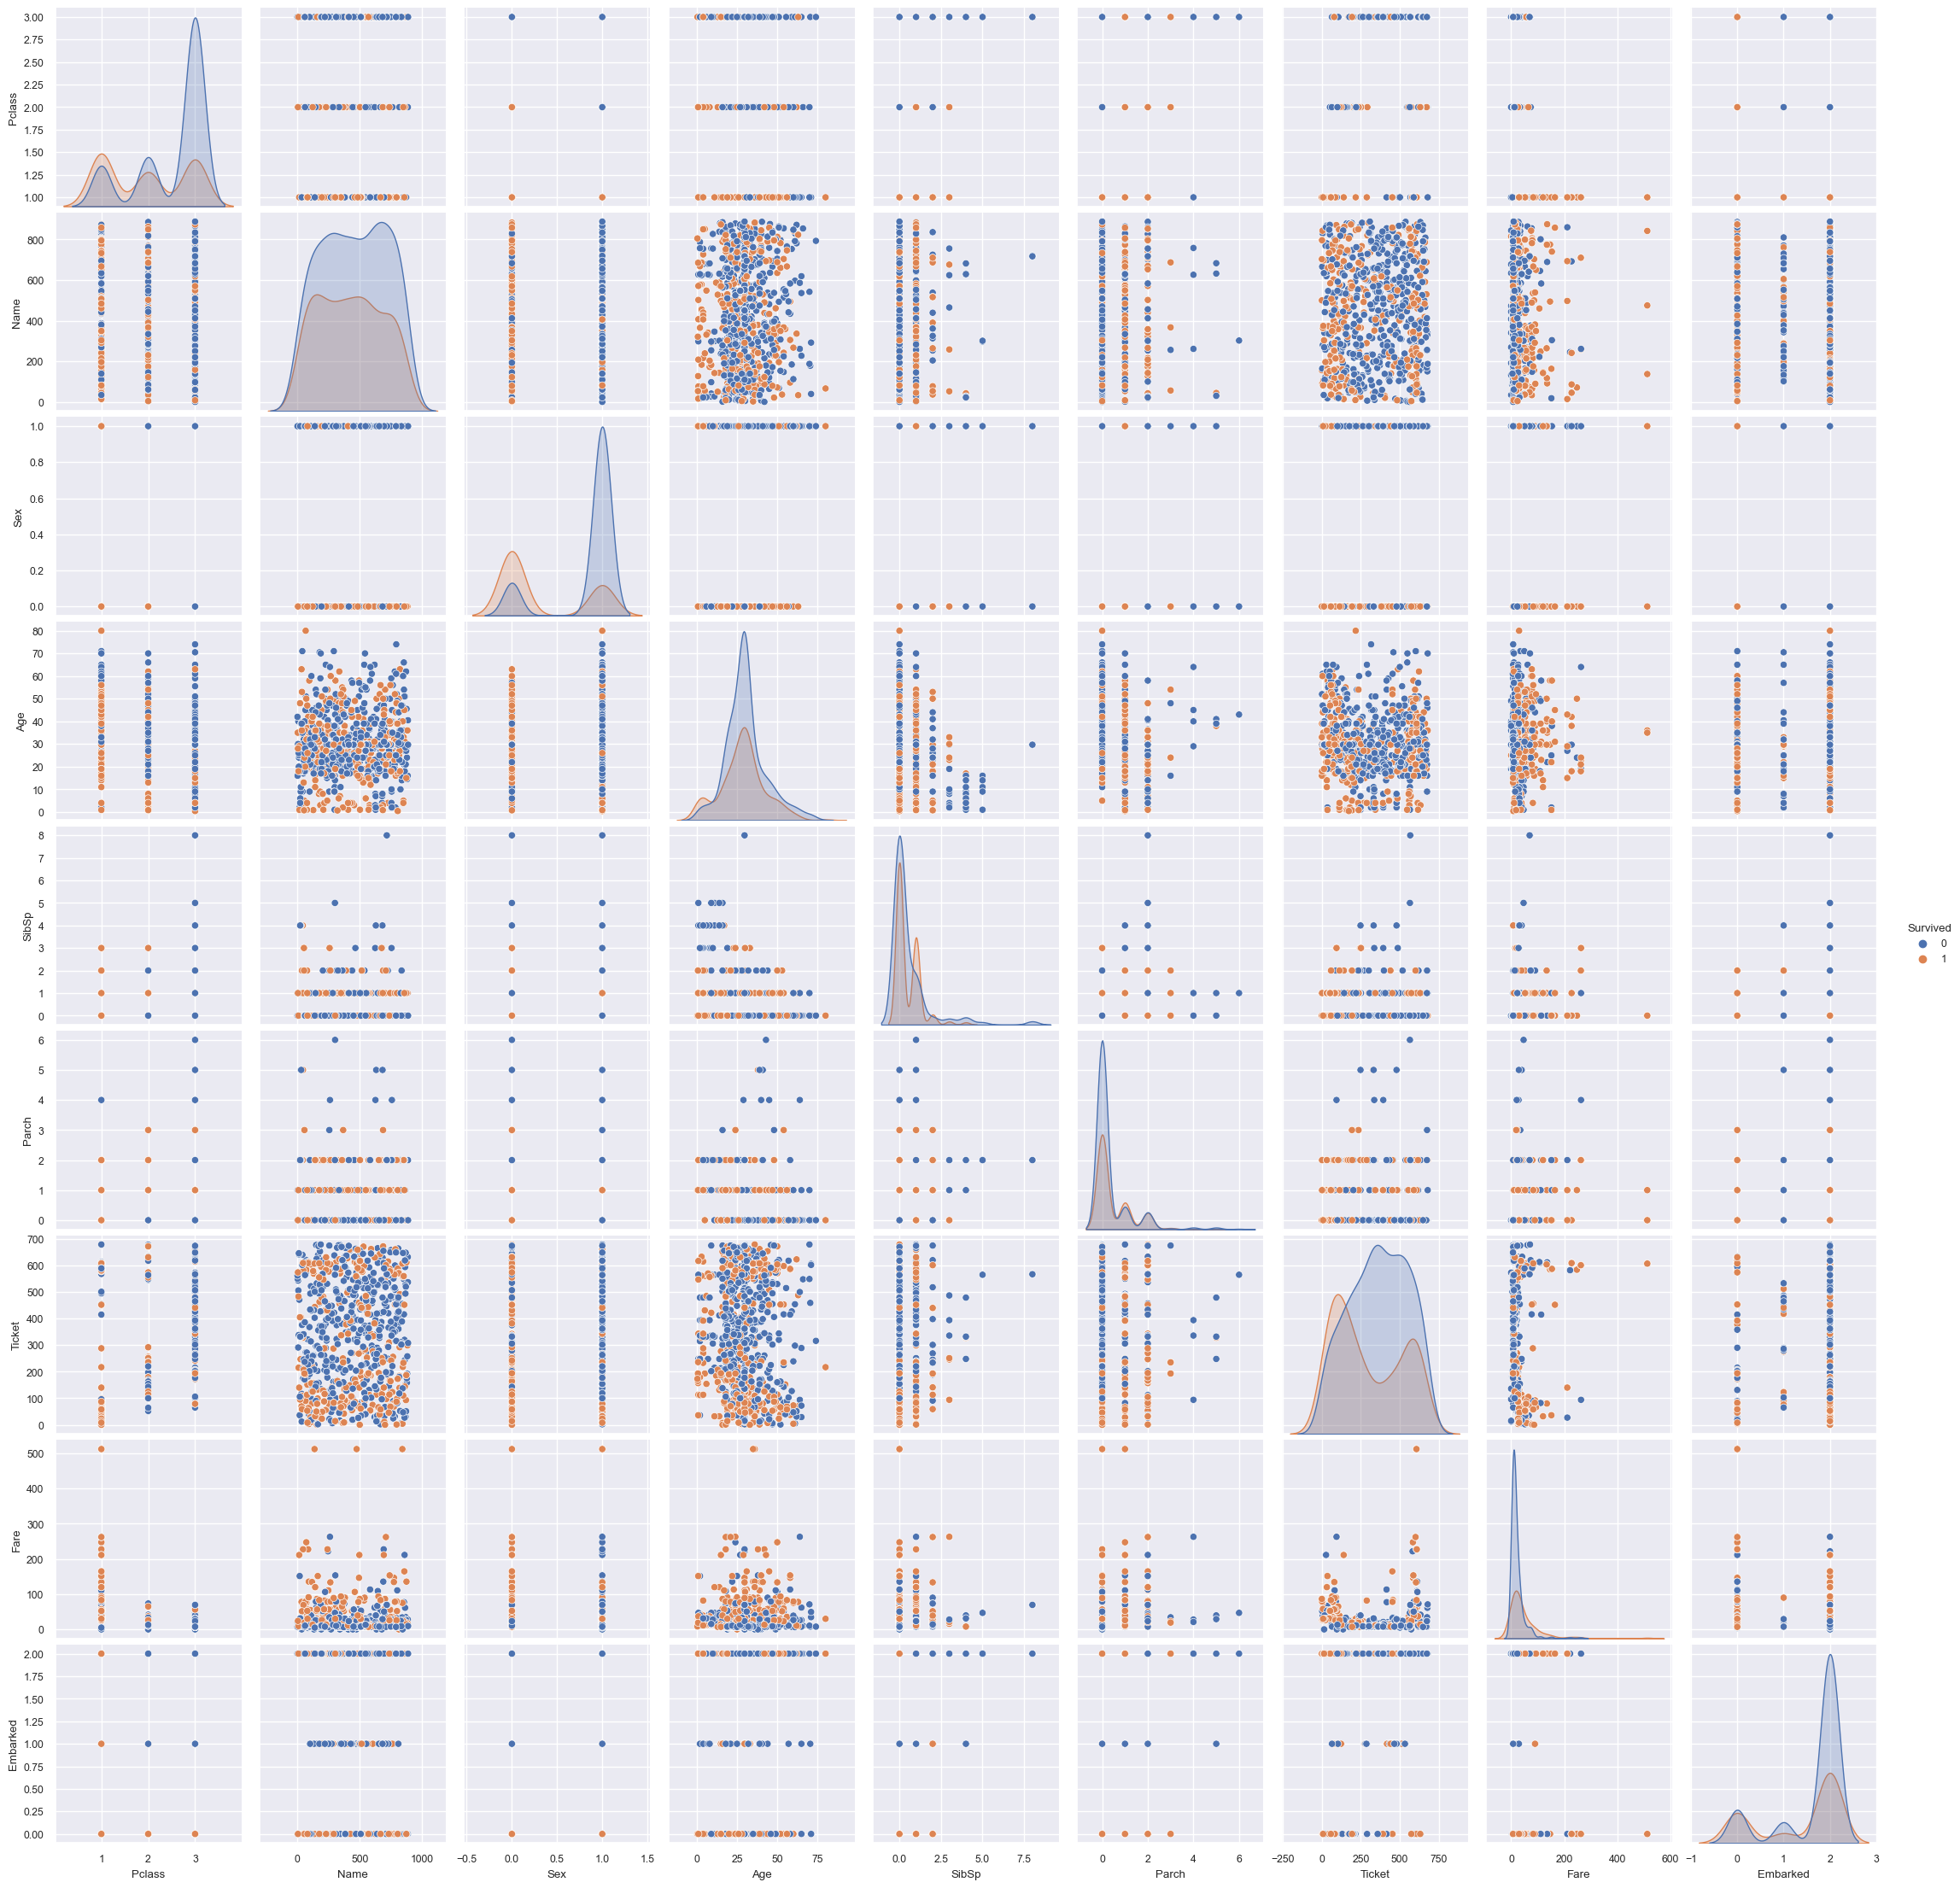

In [266]:
# pairplot

sns.pairplot(df,
             vars=['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked'],
            hue ='Survived')
plt.show()

In [267]:
y = df['Survived']

In [268]:
y

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 889, dtype: int64

In [269]:
x = df.drop( ['Name', 'Age', 'SibSp', 'Parch', 'Survived'], axis = 1 )

In [270]:
x

,Pclass,Sex,Ticket,Fare,Embarked
PassengerId,,,,,
1,3,1,522,7.2500,2
2,1,0,595,71.2833,0
3,3,0,668,7.9250,2
4,1,0,48,53.1000,2
5,3,1,471,8.0500,2
...,...,...,...,...,...
887,2,1,100,13.0000,2
888,1,0,14,30.0000,2
889,3,0,674,23.4500,2


In [271]:
#훈련세트, 테스트세트 1:3 비율로 나누기
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [272]:
#전처리전과 후 상관계수 비교하기
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(x_train)
train_scaled = ss.transform(x_train)
test_scaled = ss.transform(x_test)

In [280]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd


# SVM 모델 훈련 및 예측 전처리 전
clf_svm = SVC(random_state=0)
clf_svm.fit(x_train, y_train)
pred_svm = clf_svm.predict(x_test)

# 결과 출력
print("\n--- SVM Classifier ---")
print("Accuracy:", accuracy_score(y_test, pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
Accuracy: 0.672645739910314
Confusion Matrix:
 [[121  11]
 [ 62  29]]


In [281]:
# SVM 모델 훈련 및 예측 전처리 후
clf_svm = SVC(random_state=0)
clf_svm.fit(train_scaled, y_train)
pred_svm = clf_svm.predict(test_scaled)

# 결과 출력
print("\n--- SVM Classifier ---")
print("Accuracy:", accuracy_score(y_test, pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
Accuracy: 0.7713004484304933
Confusion Matrix:
 [[121  11]
 [ 40  51]]


In [282]:
# LR 전처리전
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(x_train, y_train)

pred_lr = clf_lr.predict(x_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.757847533632287
[[109  23]
 [ 31  60]]


In [283]:
# LR 전처리후
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(train_scaled, y_train)

pred_lr = clf_lr.predict(test_scaled)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.7623318385650224
[[109  23]
 [ 30  61]]


In [284]:
# DT 전처리전

from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(x_train, y_train)

pred_dt = clf_dt.predict(x_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.7533632286995515
[[109  23]
 [ 32  59]]


In [285]:
# DT 전처리후

from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(train_scaled, y_train)

pred_dt = clf_dt.predict(test_scaled)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.757847533632287
[[110  22]
 [ 32  59]]


In [286]:
# RT 전처리전

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

print ("\n--- Random Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(x_train, y_train)
pred = rf_clf.predict(x_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Random Forest ---
0.7892376681614349
[[112  20]
 [ 27  64]]


In [287]:
# RT 전처리후

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

print ("\n--- Random Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(train_scaled, y_train)
pred = rf_clf.predict(test_scaled)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Random Forest ---
0.7937219730941704
[[113  19]
 [ 27  64]]


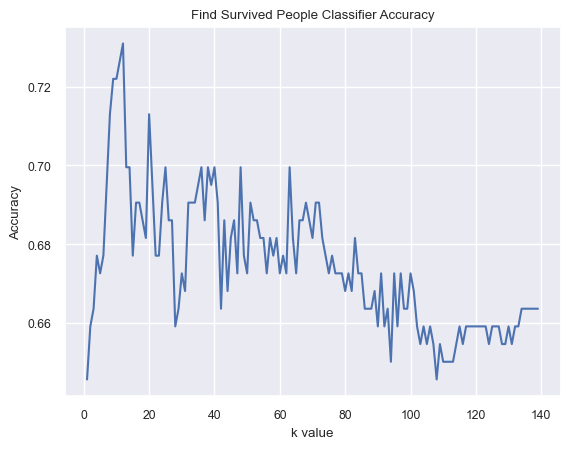

In [290]:
# KNN 전처리전

from sklearn.neighbors import KNeighborsClassifier

k_range = range(1, 140)
find_accuracy = []

for k in k_range:
  find_model = KNeighborsClassifier(n_neighbors = k)
  find_model.fit(x_train, y_train.values.ravel())

  find_accuracy.append(find_model.score(x_test, y_test))
  
plt.plot(k_range, find_accuracy, label="training accuracy")
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.title("Find Survived People Classifier Accuracy")
plt.show()

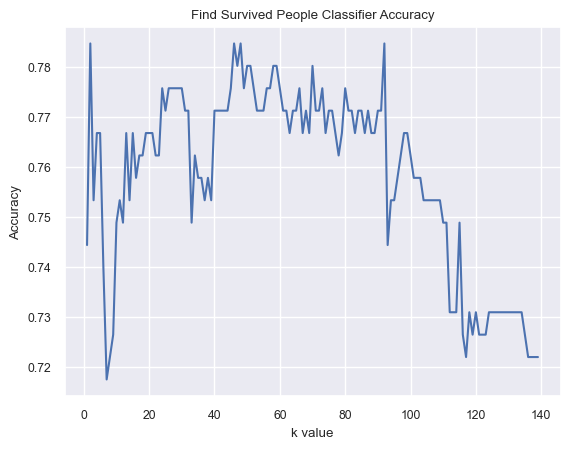

In [291]:
# KNN 전처리후

from sklearn.neighbors import KNeighborsClassifier

k_range = range(1, 140)
find_accuracy = []

for k in k_range:
  find_model = KNeighborsClassifier(n_neighbors = k)
  find_model.fit(train_scaled, y_train.values.ravel())

  find_accuracy.append(find_model.score(test_scaled, y_test))
  
plt.plot(k_range, find_accuracy, label="training accuracy")
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.title("Find Survived People Classifier Accuracy")
plt.show()